# Modelo para obtener las probabilidades de que una Mujer sea victima de violencia en los diferentes distritos de Lima Metropolitana

El modelo tiene como fin prevenir que una mujer sea victima de violencia. Para ello se va a crear un modelo que retorne las probabilidades de que una mujer sea victima de violencia en los diferentes distritos de Lima Metropolitana dado unos datos de entrada brindados por la persona.

### Importamos las siguientes librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## 1. Preparacion del Dataset

El dataset escogido contiene los registros de casos recogidos por el Centro de Emergencia de la Mujer (CEM) del Año 2020. Fue obtenido del Portal estadistico del Programa Nacional Aurora https://portalestadistico.aurora.gob.pe/bases-de-datos-2020/

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
dataframe = pd.read_csv("casos_cem_2020.csv")

El dataset cuenta con 114495 registros y 159 variables

In [8]:
dataframe.head(5)

,Unnamed: 0,CEM,CONDICION,FECHA_INGRESO,INFORMANTE,FORMA_INGRESO,VICTIMA_PERUANA,VICTIMA_CUENTA_DNI,VICTIMA_EXTRANJERA,VICTIMA_PAIS_EXTRANJERO,VICTIMA_CARNE_EXTRANJERIA,VICTIMA_SOLICITANTE_REFUGIO,VICTIMA_REFUGIADO,VICTIMA_SOLICITANTE_ASILO,VICTIMA_ASILADO,VICTIMA_APATRIDA,VICTIMA_OTRA_SIT_MIGR,VICTIMA_NINGUNA_SIT_MIGR,EDAD_VICTIMA,SEXO_VICTIMA,VICTIMA_GESTANDO,HIJAS_VIVAS,HIJOS_VIVOS,LENGUA_MATERNA_VICTIMA,ETNIA_VICTIMA,DPTO_DOMICILIO,PROV_DOMICILIO,DIST_DOMICILIO,CENTRO_POBLADO_DOMICILIO,AREA_RESIDENCIA_DOMICILIO,ESTADO_CIVIL_VICTIMA,NIVEL_EDUCATIVO_VICTIMA,ESTUDIA,LUGAR_ESTUDIA,TIPO_GESTION_ESTUDIA,TRABAJA_VICTIMA,OCUPACION_VICTIMA,SIS_SEGURO,ESSALUD_SEGURO,OTRO_SEGURO,NINGUN_SEGURO,AGRESOR_PERUANO,AGRESOR_CUENTA_DNI,AGRESOR_EXTRANJERO,AGRESOR_PAIS_EXTRANJERO,AGRESOR_CARNE_EXTRANJERIA,AGRESOR_SOLICITANTE_REFUGIO,AGRESOR_REFUGIADO,AGRESOR_SOLICITANTE_ASILO,AGRESOR_ASILADO,AGRESOR_APATRIDA,AGRESOR_OTRA_SIT_MIGR,AGRESOR_NINGUNA_SIT_MIGR,VINCULO_AGRESOR_VICTIMA,VINCULO_PAREJA,VINCULO_FAMILIAR,SIN_VINCULO,AGRESOR_VIVE_CASA_VICTIMA,EDAD_AGRESOR,SEXO_AGRESOR,NIVEL_EDUCATIVO_AGRESOR,TRABAJA_AGRESOR,OCUPACION_AGRESOR,PERTURBACION_POSESION,MENOSCABO_TENENCIA_BIENES,PERDIDA_DERECHOS_PATRIMONIALES,LIMITACION_RECURSOS_ECONOMICOS,PRIVACION_MEDIOS_INDISPENSABLES,INCUMPLIMIENTO_OBLIGACION_ALIMENTARIA,CONTROL_DE_INGRESOS,PERCEPCION_SALARIO_MENOR,OTRA_VECON_PATRIM,GRITOS_INSULTOS,VIOLENCIA_RACIAL,INDIFERENCIA,DISCR_ORIENTACION_SEXUAL,DISCR_GENERO,DISCR_IDENTIDAD_GENERO,RECHAZO,DESVALORIZACION_HUMILLACION,AMENAZA_QUITAR_HIJOS,OTRAS_AMENAZAS,PROHIBE_RECIBIR_VISITAS,PROHIBE_ESTUDIAR_TRABAJAR_SALIR,ROMPE_DESTRUYE_COSAS,VIGILANCIA_CONTINUA_PERSECUCION,BOTAR_CASA,AMENAZA_DE_MUERTE,ABANDONO,OTRA_VPSI,PUNTAPIES_PATADAS,PU�ETAZOS,BOFETADAS,JALONES_CABELLO,OTRAS_AGRESIONES,EMPUJONES,GOLPES_CON_PALOS,LATIGAZO,AHORCAMIENTO,HERIDAS_CON_ARMAS,GOLPES_CON_OBJETOS_CONTUNDENTES,NEGLIGENCIA,OTRA_VFIS,HOSTIGAMIENTO_SEXUAL,ACOSO_SEX_ESP_PUB,VIOLACION,ACTOS_CONTRA_EL_PUDOR,TRATA_CON_FINES_EXPLOTACION_SEXUAL,EXPLOTACION_SEXUAL,PORNOGRAFIA,OTRA_VSEX,DEPENDE_VICTIMA_FEMINICIDIO,PRIMERA_VEZ_AGREDE,N_A�OS,N_MESES,N_SEMANAS,FRECUENCIA_AGREDE,ESTADO_AGRESOR_U_A,ESTADO_AGRESOR_G,ESTADO_VICTIMA_U_A,ESTADO_VICTIMA_G,TRATAMIENTO_PSICOLOGICO,TRATAMIENTO_PSIQUIATRICO,ATENCION_MEDICA,OTRO_TRATAMIENTO,NINGUN_TRATAMIENTO,CONTINUA_RECIBIENDO_TRATAMIENTO,VINCULO_AFECTIVO_FAMILIA,VINCULO_AFECTIVO_AMIGOS,VINCULO_AFECTIVO_VECINOS,VINCULO_AFECTIVO_ASOCIACIONES,VINCULO_AFECTIVO_ORGANIZACIONES_CIVICAS,VINCULO_AFECTIVO_COMPA�EROS_TRABAJO,VINCULO_AFECTIVO_OTRO,VINCULO_AFECTIVO_NINGUNO,REDES_FAM_SOC,APOYO_EMOCIONAL,APOYO_COGNITIVO,APOYO_INSTRUMENTAL,APOYO_MATERIAL,FACTOR_AGRESOR_CONSUMO_ALCOHOL,FACTOR_AGRESOR_CONSUME_DROGA,FACTOR_VICTIMA_DISCAPACIDAD,FACTOR_VICTIMA_ABUSO_CONSUMO_ALCOHOL,FACTOR_VICTIMA_CONSUME_DROGAS,VULNERABILIDAD_VICTIMA_LGTBI,VULNERABILIDAD_VICTIMA_VIH,VIOLENCIA_CARCELARIA,NIVEL_DE_RIESGO_VICTIMA,INTERPUSO_DENUNCIA,DONDE_INTERPUSO_DENUNCIA,DESEA_DENUNCIAR,CUENTA_MEDIDAS_PROTECCION,CUENTA_MEDIDAS_CAUTELARES,DESEA_PATROCINIO_LEGAL,CASO_TENTATIVA_DE_FEMINICIDIO,LUGAR_TENTATIVA_DE_FEMINICIDIO,SITUACION_AGRESOR,TIPO_VIOLENCIA
0,1,ABANCAY,3,2020-01-08,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,0,0.0,1,0,10,1,3,1,1,1,U,1,7,1,3.0,2.0,0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,NaN,NaN,1,35.0,1,6.0,1.0,36.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,0.0,5.0,2,1.0,1,1.0,NaN,NaN,NaN,NaN,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1.0,NaN,0.0,0.0,1,0.0,NaN,NaN,2
1,2,ABANCAY,1,2020-01-10,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,0,0.0,0,1,10,7,3,1,1,1,U,2,10,1,3.0,2.0,1,89.0,NaN,1.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,2,35.0,1,10.0,1.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
dataframe.shape

(114495, 159)

In [10]:
from pandasql import sqldf

In [11]:
pysqldf = lambda q: sqldf(q, globals())

Exploramos el dataset y se puede observar que en lugar de sus nombres los departamentos estan codificados con números.

In [12]:
#NÚMERO DE CASOS DE LOS 5 DEPARTAMENTOS CON MÁS CASOS
pysqldf("SELECT COUNT(*) AS casos, DPTO_DOMICILIO FROM dataframe GROUP BY DPTO_DOMICILIO ORDER BY casos DESC;").head(5)

,casos,DPTO_DOMICILIO
0,32653,15
1,11222,4
2,8176,8
3,5771,13
4,5099,2


Haciendo uso de los Códigos de Ubicación Geográfica (UBIGEO) brindados por la INEI se pudo saber que el código del departamento de Lima es 15. Asimismo, se pudo saber que el código para Lima Metropolitana es 1

In [13]:
#NUMERO DE CASOS DE LAS PROVINCIAS DEL DEPARTAMENTO DE LIMA
pysqldf("SELECT COUNT(*) AS casos_lima_prov, PROV_DOMICILIO FROM dataframe WHERE DPTO_DOMICILIO = 15 GROUP BY PROV_DOMICILIO ORDER BY casos_lima_prov DESC;")

,casos_lima_prov,PROV_DOMICILIO
0,28155,1
1,1328,5
2,913,2
3,858,8
4,631,6
5,549,7
6,75,9
7,57,4
8,51,10
9,36,3


A continuación realizamos una exploracion del numero de casos de violencia contra la Mujer en los diferentes distritos de Lima Metropolitana.

In [14]:
#NUMERO DE CASOS DE LOS DISTRITOS DE LIMA_METROPOLITANA
pysqldf("SELECT COUNT(*) AS casos_lima_metro, DIST_DOMICILIO FROM dataframe WHERE DPTO_DOMICILIO = 15 AND PROV_DOMICILIO = 1 GROUP BY DIST_DOMICILIO ORDER BY casos_lima_metro DESC;")

,casos_lima_metro,DIST_DOMICILIO
0,2978,32
1,2351,43
2,2265,35
3,2172,42
4,1950,3
5,1345,25
6,1141,17
7,1136,8
8,1003,1
9,928,10


De las 159 variables procedemos a retirar las variables que no contribuyan a la creacion del modelo predictivo para obtener la probabilidad de que una Mujer sufra de violencia en un distrito. Por ejemplo, como nuestra meta es prevenir que suceda un caso de violencia para una mujer quitamos las variables relacionadas con el agresor, ya que estos datos tambien son registrados por el CEM.

In [15]:
#VARIABLES DEL AGRESOR
dataframe.columns.get_loc("AGRESOR_PERUANO")

41

In [16]:
dataframe.columns.get_loc("SITUACION_AGRESOR")

157

In [17]:
#Eliminar variables del agresor
droprange = list(range(41, 158))
dataframe.drop(dataframe.columns[droprange], axis=1, inplace=True)

In [18]:
#dataframe.head(5)

De igual manera quitamos algunas variables que se pueden considerar irrelevantes como si la victima cuenta o no con dni y su estado migratorio.

In [19]:
#VARIABLES NO RELEVANTES
dataframe.columns.get_loc("VICTIMA_CUENTA_DNI")

7

In [20]:
dataframe.columns.get_loc("VICTIMA_NINGUNA_SIT_MIGR")

17

In [21]:
#ELIMINAR VARIABLES NO RELEVANTES
droprange = list(range(7, 18))
dataframe.drop(dataframe.columns[droprange], axis=1, inplace=True)

In [22]:
#dataframe.head(5)

In [23]:
dataframe.drop(['CONDICION','Unnamed: 0', 'CEM', 'FECHA_INGRESO', 'INFORMANTE', 'FORMA_INGRESO', 'LENGUA_MATERNA_VICTIMA', 'ETNIA_VICTIMA', 'CENTRO_POBLADO_DOMICILIO', 'AREA_RESIDENCIA_DOMICILIO', 'NIVEL_EDUCATIVO_VICTIMA', 'LUGAR_ESTUDIA', 'TIPO_GESTION_ESTUDIA', 'OCUPACION_VICTIMA', 'TIPO_VIOLENCIA'], axis=1, inplace=True)

Rellenamos con 0s los valores nan.

In [24]:
#Rellenamos con 0s los valors nan
dataframe = dataframe.fillna(0)

Creamos la variable "TIENE_SEGURO", el cual es la suma de las variables de los diferentes seguros de salud. Tambien se crea la variable "TIENE_HIJOS" el cual es la suma de las variables "HIJAS_VIVAS" e "HIJOS_VIVOS".

In [25]:
dataframe['SIS_SEGURO'] = dataframe['SIS_SEGURO'].astype('int64')
dataframe['ESSALUD_SEGURO'] = dataframe['ESSALUD_SEGURO'].astype('int64')
dataframe['OTRO_SEGURO'] = dataframe['OTRO_SEGURO'].astype('int64')
dataframe['VICTIMA_GESTANDO'] = dataframe['VICTIMA_GESTANDO'].astype('int64')

In [26]:
#dataframe.dtypes

In [27]:
#AGREGAR VARIABLE TIENE SEGURO = SUMA DE LOS SEGUROS
TIENE_SEGURO = dataframe['SIS_SEGURO'] + dataframe['ESSALUD_SEGURO'] + dataframe['OTRO_SEGURO']
dataframe.insert(loc=len(dataframe.columns)-1, column='TIENE_SEGURO', value=TIENE_SEGURO)

In [28]:
dataframe.drop(['SIS_SEGURO', 'ESSALUD_SEGURO', 'OTRO_SEGURO', 'NINGUN_SEGURO'], axis=1, inplace=True)

In [29]:
#AGREGAR VARIABLE TIENE HIJOS (1) = SUMA DE HIJOS E HIJAS 
N_HIJOS = dataframe['HIJAS_VIVAS'] + dataframe['HIJOS_VIVOS']
dataframe.insert(loc=6, column='N_HIJOS', value=N_HIJOS)

In [30]:
dataframe.drop(['HIJAS_VIVAS', 'HIJOS_VIVOS'], axis=1, inplace=True)

In [31]:
#dataframe.dtypes

In [32]:
#AHORA REDUCIMOS EL DATASET

In [33]:
#dataframe.size

Utilizando la variable "SEXO_VICTIMA" realizamos una inspeccion para saber si todos los resgistros tienen como victima a la mujer. Sin embargo, observamos que tambien hay casos registrados por el CEM en que la victima es hombre. Por ello, se procede a elimnar los registros en que la victima sea hombre.

In [34]:
pysqldf("SELECT COUNT(*) AS victims, SEXO_VICTIMA FROM dataframe GROUP BY SEXO_VICTIMA ORDER BY victims DESC;")

,victims,SEXO_VICTIMA
0,97926,0
1,16569,1


In [35]:
#Eliminamos los registros donde el sexo sea masculino
dataframe = dataframe[dataframe.SEXO_VICTIMA == 0]

In [36]:
dataframe.shape

(97926, 12)

In [37]:
#Eliminamos los registros que no sean del departamento de lima
dataframe = dataframe[dataframe.DPTO_DOMICILIO == 15]

In [38]:
dataframe.shape

(27133, 12)

Procedemos a eliminar los registros que no sean del departamento de Lima.

In [39]:
#Eliminamos los registros que no sean de la provincia de lima_metropolitana
dataframe = dataframe[dataframe.PROV_DOMICILIO == 1]

In [40]:
dataframe.shape

(23182, 12)

Por ultimo eliminamos las columnas de sexo, dpt y prov, ya que solo nos vamos a enfocaremos en distritos de lima

In [41]:
#Por ultimo eliminamos las columnas de sexo, dpt y prov, ya que solo nos enfocaremos en distritos de lima
dataframe.drop(['SEXO_VICTIMA', 'DPTO_DOMICILIO', 'PROV_DOMICILIO'], axis=1, inplace=True)

Ahora colocamos la columna del distrito al final del dataset, ya que sera nuestro target al cacular la probabilidad de que en ese distrito sea victima de violencia.

In [42]:
#AHORA COLOCAMOS LA COMLUNA DEL DISTRITO AL FINAL, YA QUE SERA EL TARGET
DISTRITOS = dataframe.pop('DIST_DOMICILIO')
dataframe.insert(len(dataframe.columns), 'DIST_DOMICILIO', DISTRITOS)

In [43]:
dataframe['N_HIJOS'] = (dataframe['N_HIJOS'] >= 1).astype(int)

In [44]:
dataframe['ESTADO_CIVIL_VICTIMA'] = (dataframe['ESTADO_CIVIL_VICTIMA'] >= 1).astype(int)

Además, procedmos a cambiar los codigos de los distritos por sus nombres haciendo uso de los Códigos de Ubicación Geográfica (UBIGEO)

In [45]:
distritos = ["Lima",
"Ancon",
"Ate",
"Barranco",
"Breña",
"Carabayllo",
"Chaclacayo",
"Chorrillos",
"Cieneguilla",
"Comas",
"El Agustino",
"Independencia",
"Jesus Maria",
"La Molina",
"La Victoria",
"Lince",
"Los Olivos",
"Lurigancho",
"Lurin",
"Magdalena del Mar",
"Pueblo Libre",
"Miraflores",
"Pachacamac",
"Pucusana",
"Puente Piedra",
"Punta Hermosa",
"Punta Negra",
"Rimac",
"San Bartolo",
"San Borja",
"San Isidro",
"San Juan de Lurigancho",
"San Juan de Miraflores",
"San Luis",
"San Martin de Porres",
"San Miguel",
"Santa Anita",
"Santa Maria del Mar",
"Santa Rosa",
"Santiago de Surco",
"Surquillo",
"Villa El Salvador",
"Villa Maria del Triunfo"]

In [46]:
for i in range(1,44):
    dataframe.loc[dataframe.DIST_DOMICILIO == i, 'DIST_DOMICILIO'] = distritos[i-1]

Al final obtenemos un dataset de 23182 registros y 9 variables.

In [47]:
dataframe.head(5)

,VICTIMA_PERUANA,EDAD_VICTIMA,VICTIMA_GESTANDO,N_HIJOS,ESTADO_CIVIL_VICTIMA,ESTUDIA,TRABAJA_VICTIMA,TIENE_SEGURO,DIST_DOMICILIO
788,1,26,0,1,1,0,1,1,San Juan de Lurigancho
789,1,1,0,0,1,0,0,1,San Juan de Lurigancho
1341,1,44,0,1,1,0,1,1,Villa Maria del Triunfo
2519,1,8,0,0,1,0,0,1,Villa El Salvador
2599,1,37,0,0,1,0,0,1,La Victoria


In [48]:
dataframe.shape

(23182, 9)

In [49]:
dataframe.dtypes

VICTIMA_PERUANA          int64
EDAD_VICTIMA             int64
VICTIMA_GESTANDO         int64
N_HIJOS                  int32
ESTADO_CIVIL_VICTIMA     int32
ESTUDIA                  int64
TRABAJA_VICTIMA          int64
TIENE_SEGURO             int64
DIST_DOMICILIO          object
dtype: object

Creamos un nuevo dataset con los casos registrado en Lima Metropolitana

In [50]:
dataframe.to_csv("casos_cem_2020_lima.csv")

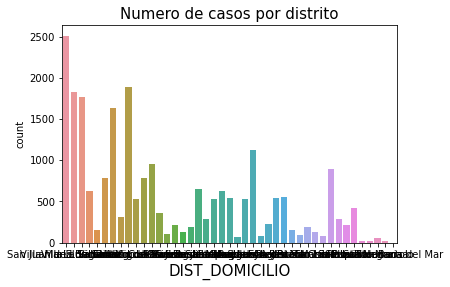

In [51]:
sns.countplot(data = dataframe, x = 'DIST_DOMICILIO')
plt.xlabel('DIST_DOMICILIO', fontsize = 15)
plt.title('Numero de casos por distrito', fontsize = 15)
plt.show()

## 2. Creacion del modelo de Árbol de Decisión

In [52]:
#ALGORITMO DT

Separamos las variables que seran utilizadas para predecir de la varaible target(Ditrito), la cual es la que se busca predecir.

In [53]:
#VARIABLES DE ENTRENAMIENTO (X) Y VARIAABLE TARGET(Y -> DISTRITO)
X = dataframe.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataframe.iloc[:,-1].values

Separamos los registros en resgistros de entrenamiento y de test en un porcentaje de 80% y 20% del dataset respectivamente.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Creamos el Árbol de Decision hacinedo uso de la libreria "sklearn" y lo entrenamos haciendo uso de la data de entrenamiento.

In [55]:
classifier = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10).fit(X_train, y_train)

In [56]:
#plt.figure(figsize = (20,8))
#tree.plot_tree(classifier)
#plt.show()

Se procede a probar el modelo con la data de testeo para luego comparar el resultado con el resultado esperado y ver que tan bien trabaja el modelo entrenado.

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
confusion_matrix(y_test, y_pred)

array([[ 0,  4,  0, ...,  0,  2,  5],
       [ 2, 39,  0, ...,  0, 12, 28],
       [ 0,  3,  2, ...,  0,  2,  2],
       ...,
       [ 0,  8,  0, ...,  0,  8,  3],
       [ 0, 39,  0, ...,  0, 24, 32],
       [ 1, 33,  0, ...,  0, 18, 47]], dtype=int64)

Se procede a obtener la probabilidads de las predicciones estimadas, la cual vendria a ser la probabilidad de la mujer de ser victima de violencia en los distritos.

In [60]:
y_pred_prob = classifier.predict_proba(X_test)

Procedemos a obtener un reporte del modelo entrenado para saber su precisión de la predicción. Así, se puede observar que la precisión de las diferentes clases(distritos) no es muy elevada. Esto podria deberse a la gran cantidad de clases que tiene el target distrito, ya que mayormente mientras menores clases tenga el target mayor precision trenda el modelo.

In [61]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

                  Ancon       0.00      0.00      0.00        45
                    Ate       0.09      0.12      0.10       320
               Barranco       0.22      0.06      0.10        33
                  Breña       0.00      0.00      0.00        35
             Carabayllo       0.02      0.01      0.01       128
             Chaclacayo       0.00      0.00      0.00        11
             Chorrillos       0.08      0.04      0.06       164
            Cieneguilla       0.33      0.03      0.05        34
                  Comas       0.03      0.01      0.01       166
            El Agustino       0.05      0.01      0.02       105
          Independencia       0.00      0.00      0.00       100
            Jesus Maria       0.00      0.00      0.00        24
              La Molina       0.20      0.04      0.07        77
            La Victoria       0.06      0.01      0.01       119
                   Lima 

D:\Programas\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Por último, creamos un dataframe con los valores predecidos anteriormente y ver las probabilidades obtenidas en cada distrito segun los diferentes registros.

In [62]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [63]:
dataf.columns = ['VICTIMA_PERUANA','EDAD_VICTIMA','VICTIMA_GESTANDO','N_HIJOS','ESTADO_CIVIL_VICTIMA','ESTUDIA','TRABAJA_VICTIMA','TIENE_SEGURO','DIST_DOMICILIO','PRED_DIST_DOMICILIO','Lima','Ancon','Ate','Barranco','Breña','Carabayllo','Chaclacayo','Chorrillos','Cieneguilla','Comas','El Agustino','Independencia','Jesus Maria','La Molina','La Victoria','Lince','Los Olivos','Lurigancho','Lurin','Magdalena del Mar','Pueblo Libre','Miraflores','Pachacamac','Pucusana','Puente Piedra','Punta Hermosa','Punta Negra','Rimac','San Bartolo','San Borja','San Isidro','San Juan de Lurigancho','San Juan de Miraflores','San Luis','San Martin de Porres','San Miguel','Santa Anita','Santa Maria del Mar','Santa Rosa','Santiago de Surco','Surquillo','Villa El Salvador','Villa Maria del Triunfo']

In [64]:
dataf.head(5)

,VICTIMA_PERUANA,EDAD_VICTIMA,VICTIMA_GESTANDO,N_HIJOS,ESTADO_CIVIL_VICTIMA,ESTUDIA,TRABAJA_VICTIMA,TIENE_SEGURO,DIST_DOMICILIO,PRED_DIST_DOMICILIO,Lima,Ancon,Ate,Barranco,Breña,Carabayllo,Chaclacayo,Chorrillos,Cieneguilla,Comas,El Agustino,Independencia,Jesus Maria,La Molina,La Victoria,Lince,Los Olivos,Lurigancho,Lurin,Magdalena del Mar,Pueblo Libre,Miraflores,Pachacamac,Pucusana,Puente Piedra,Punta Hermosa,Punta Negra,Rimac,San Bartolo,San Borja,San Isidro,San Juan de Lurigancho,San Juan de Miraflores,San Luis,San Martin de Porres,San Miguel,Santa Anita,Santa Maria del Mar,Santa Rosa,Santiago de Surco,Surquillo,Villa El Salvador,Villa Maria del Triunfo
0,1,68,0,0,1,0,1,0,San Miguel,Breña,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.000000
1,1,12,0,0,1,1,0,1,Carabayllo,Villa Maria del Triunfo,0.011538,0.046154,0.007692,0.000000,0.038462,0.015385,0.038462,0.011538,0.050000,0.015385,0.046154,0.003846,0.011538,0.011538,0.019231,0.011538,0.046154,0.030769,0.011538,0.011538,0.003846,0.019231,0.0,0.000000,0.076923,0.0,0.0,0.023077,0.0,0.003846,0.007692,0.096154,0.019231,0.00000,0.034615,0.007692,0.023077,0.0,0.003846,0.042308,0.003846,0.096154,0.100000
2,1,24,0,1,1,0,0,0,Ate,San Martin de Porres,0.003247,0.090909,0.009740,0.003247,0.009740,0.003247,0.051948,0.000000,0.042208,0.025974,0.032468,0.003247,0.003247,0.019481,0.038961,0.019481,0.061688,0.006494,0.035714,0.000000,0.000000,0.006494,0.0,0.003247,0.048701,0.0,0.0,0.022727,0.0,0.000000,0.003247,0.107143,0.025974,0.00974,0.116883,0.012987,0.022727,0.0,0.000000,0.016234,0.003247,0.068182,0.071429
3,1,69,0,1,1,0,0,0,Villa El Salvador,La Molina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.142857,0.142857
4,0,29,0,1,1,0,0,0,Carabayllo,La Molina,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.125000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.125000,0.000000
